#**Telecom X - Análisis de Evasión de Clientes**

He sido contratado como asistente de análisis de datos en Telecom X para colaborar en el proyecto **"Churn de Clientes"**. La empresa está enfrentando una alta tasa de cancelaciones de servicios y mi objetivo es contribuir a identificar los factores que influyen en la pérdida de clientes.

Mi responsabilidad será recopilar, procesar y analizar los datos disponibles, utilizando **Python** y sus principales bibliotecas. A partir del análisis, el equipo de Data Science podrá desarrollar modelos predictivos más precisos y diseñar estrategias efectivas para reducir la evasión.

Durante este proyecto voy a:

* ✅ Importar y manipular datos desde una API de forma eficiente.
* ✅ Aplicar el proceso **ETL (Extracción, Transformación y Carga)** para * preparar los datos.
* ✅ Crear visualizaciones estratégicas que permitan detectar patrones y tendencias relevantes.
* ✅ Realizar un **Análisis Exploratorio de Datos (EDA)** y generar un informe con los principales hallazgos e insights.





Estoy listo para transformar los datos en información estratégica que ayude a Telecom X a tomar decisiones informadas y a retener más clientes. 🚀

###**Extracción de los datos**

Link de la API: https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json

In [2]:
import pandas as pd

datos = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


###**Transformación de los datos**

####Primero debemos normalizar los objetos y arreglos que trajo el DataSet, para poder acceder a cada variable de forma independiente

#####Extraemos cada columna JSON y la convertimos en un DataSet individual

In [3]:
customer = pd.json_normalize(datos['customer'])
phone = pd.json_normalize(datos['phone'])
internet = pd.json_normalize(datos['internet'])
account = pd.json_normalize(datos['account'])
customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


#####Eliminamos esas columnas JSON de nuestro DataSet original

In [4]:
datos.drop(columns=['customerID','customer', 'phone', 'internet', 'account'], inplace=True)
datos.head()





,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes


#####Unificamos los nuevos sub-DataSets con el dataset original

In [5]:
datos = datos.merge(customer, left_index=True, right_index=True).merge(phone, left_index=True, right_index=True).merge(internet, left_index=True, right_index=True).merge(account, left_index=True, right_index=True)

In [6]:
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


####Ahora eliminamos valores nulos del DataSet

#####Como se ve acontinuación, no hay valores nulos directamente, pero es necesaria una inspección más detallada

In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


#####Eliminamos texto vacío de la columna Charges.Total y lo reemplazamos por 0. Además, seleccionamos todas las columnas que sean de tipo numérico

In [8]:
datos['Charges.Total'] = datos['Charges.Total'].str.replace(" ", "0").astype('float')
columnas_numericas = datos.select_dtypes(include=['number']).columns
columnas_numericas


Index(['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total'], dtype='object')

#####Seleccionamos todas las columnas que tengan tipo "object", que son las columnas categóricas

In [9]:
columnas_categoricas = datos.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

#####Transformamos todos los textos a minúsculas

In [10]:
datos[columnas_categoricas] = datos[columnas_categoricas].map(lambda x: x.lower())


#####Y aquí verificamos que las columnas no tengan valores inesperados

In [11]:
datos['PaperlessBilling'].unique()

array(['yes', 'no'], dtype=object)

####Transformamos el DataSet para optimizar el análisis

#####Creamos la columna Cuentas_Diarias que da una idea del gasto diario de cada usuario

In [12]:
datos['Cuentas_Diarias'] = datos['Charges.Monthly']/30
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,no,female,0,yes,yes,9,yes,no,dsl,no,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,no,male,0,no,no,9,yes,yes,dsl,no,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,yes,male,0,no,no,4,yes,no,fiber optic,no,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,yes,male,1,yes,no,13,yes,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,yes,female,1,yes,no,3,yes,no,fiber optic,no,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


#####Reemplazamos los valores vacíos en Churn por "No"

In [13]:
datos['Churn'] = datos['Churn'].apply(lambda x: "no" if x=="" else x)

In [14]:
datos['Churn'].unique()

array(['no', 'yes'], dtype=object)

###Análisis y Visualización de Datos

####Graficamos la distribución de evasión de los usuarios de TelecomX

In [15]:

import plotly.express as px
px.defaults.template = "seaborn"
fig = px.pie(datos, names='Churn', title='Distribución de Abandono de Clientes de Telecom X')

fig.update_layout(
    legend = dict(
        orientation="v",
        yanchor="middle",

        xanchor="right",
        x=0.7
    ),


)

fig.show()

####Visualizamos la relación entre variables categóricas y la evasión de los clientes

#####Trabajamos solos con los datos de los usuarios que abandonaron la empresa

In [16]:
evasion = datos.query('Churn ==  "yes"')

#####Extraemos la relación del género con la evasión

In [17]:
gender = evasion['gender'].value_counts()

gender = gender.reset_index()
gender.columns = ['gender', 'count']
gender

,gender,count
0,female,939
1,male,930


#####Extraemos la relación del tipo de contrato con la evasión

In [18]:
contract = evasion['Contract'].value_counts()

contract = contract.reset_index()
contract.columns = ['Contract', 'count']
contract

,Contract,count
0,month-to-month,1655
1,one year,166
2,two year,48


#####Extraemos la relación del tipo de pago con la evasión

In [19]:
payment_method = evasion['PaymentMethod'].value_counts()

payment_method = payment_method.reset_index()
payment_method.columns = ['PaymentMethod', 'count']
payment_method

,PaymentMethod,count
0,electronic check,1071
1,mailed check,308
2,bank transfer (automatic),258
3,credit card (automatic),232


#####Extraemos la relación del servicio de internet contratado con la evasión

In [20]:
internet_sevice = evasion['InternetService'].value_counts()

internet_sevice = internet_sevice.reset_index()
internet_sevice.columns = ['InternetService', 'count']
internet_sevice

,InternetService,count
0,fiber optic,1297
1,dsl,459
2,no,113


#####Graficamos estas relaciones en un mismo Plot

In [25]:
from  plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows = 2, cols= 2, subplot_titles=['Distribución de abandono por género', "Distribución de abandono por tipo de contrato", "Distribución de abandono por método de pago"])

gender_bar = go.Bar(x=gender['gender'], y=gender['count'])
gender_bar.update()
contract_bar = go.Bar(x=contract['Contract'], y=contract['count'] )

payment_bar = go.Bar(x=payment_method['PaymentMethod'], y=payment_method['count'])

internet_bar = go.Bar(x=internet_sevice['InternetService'], y=internet_sevice['count'])

#ax = plt.bar(x=gender.index, height=gender.values, )
fig.add_trace(gender_bar, row=1, col=1)
fig.layout.xaxis.title = 'Género'
fig.layout.yaxis.title = 'Cantidad de evasión'
fig.add_trace(contract_bar, row=1, col=2)
fig.layout.xaxis2.title = 'Tipo de contrato'
fig.layout.yaxis2.title = 'Cantidad de evasión'
fig.add_trace(payment_bar, row=2, col=1)
fig.layout.xaxis3.title = 'Método de pago'
fig.layout.yaxis3.title = 'Cantidad de evasión'
fig.add_trace(internet_bar, row=2, col=2)
fig.layout.xaxis4.title = 'Servicio de Internet'

fig.layout.yaxis4.title = 'Cantidad de evasión'
fig.update_layout(dict(
    height=1000, width=1000, title_text="Relación de abandono por distintas variables en TelecomX",
    showlegend=False
))


fig.show()

####Ahora estableceremos relación entre las variables numéricas y el abandono

#####Generamos un nuevo dataset solo con las variables numericas y "Churn", y transformamos Churn de "yes", "no" a 1 y 0, respectivamente.

In [22]:
datos_numericos = datos.loc[:, ['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']]
datos_numericos['Churn'] = datos_numericos['Churn'].apply(lambda x: 1 if x == "yes" else 0)
no_evasion = datos_numericos.query('Churn == 0')
evasion = datos_numericos.query('Churn == 1')





#####Revisamos la correlación de las variables con el abandono

In [39]:
datos_numericos.corr()

,Churn,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
Churn,1.000000,-0.344079,0.189866,-0.193345,0.189866
tenure,-0.344079,1.000000,0.247982,0.825407,0.247982
Charges.Monthly,0.189866,0.247982,1.000000,0.652211,1.000000
Charges.Total,-0.193345,0.825407,0.652211,1.000000,0.652211
Cuentas_Diarias,0.189866,0.247982,1.000000,0.652211,1.000000


#####Graficamos la comparación entre los gastos medios mensuales entre el grupo de clientes que abandonó la empresa y el que no

In [37]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


Charges_means = [evasion['Charges.Monthly'].mean(), no_evasion['Charges.Monthly'].mean()]
tenure_means = [no_evasion['tenure'].mean(), evasion['tenure'].mean()]
fig = go.Figure()
fig.add_trace(go.Bar(x=["Si", "No"], y=Charges_means, text=Charges_means, textposition="outside"))




fig.update_layout(width=600, height=600, title="Comparación de media de gastos mensuales entre clientes<br>que permanecieron en la empresa y los que no", xaxis_title="Abandono", yaxis_title="Media de gastos mensuales")

fig.show()
#


##Informe Final

###Introducción
Este informe tiene como objetivo revelar información importante a la compañía TelecomX acerca de la emergente tendencia de cancelación de servicios de sus clientes. Basándome en un conjunto de datos de los clientes de la compañía, se ha hecho un proceso de ETL (Extracción, Transformación y Carga) para obtener insights que puedan ayudar a la toma de decisiones para mejorar esta problemática.

###Limpieza y tratamiento de datos
Los datos proporcionados vienen de una API en formato JSON. Por ende, requerían una serie de transformaciones para poder trabajar con el conjunto de datos.

1. Se normalizaron las columnas cuyos valores eran objetos JSON.
2. Se eliminaron valores nulos y vacíos del dataset.
3. Se corrigieron valores inesperados en las columnas.
4. Agregamos la columna Cuentas_Diarias para tener una mejor idea del gasto diario de cada cliente.

###Análisis exploratorio de los datos
Luego de tratar los datos correctamente, seguía la parte del análisis de los datos.

1. Graficamos la proporción de cancelación de subscripción entre los usuarios en el dataset.
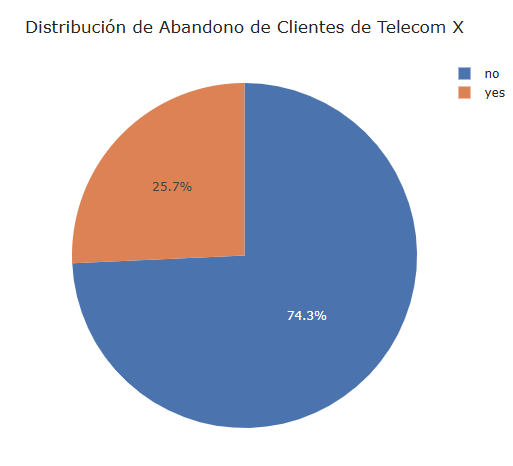





2. Visualizamos la relación entre las variables categóricas como Género, Servico de Internet, Método de pago y Tipo de contrato, con el abandono de los clientes.
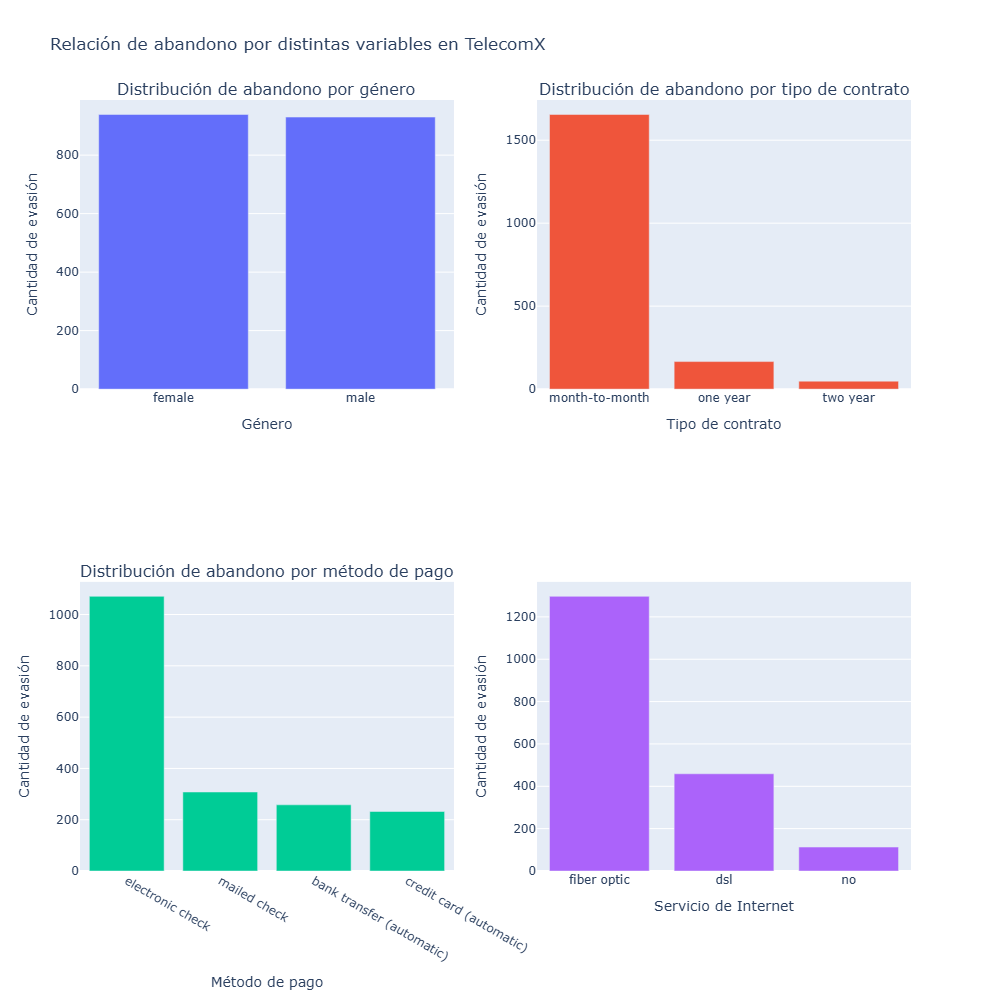
3. Graficamos también la comparación entre los gastos mensuales de los clientes que abandonaron y los que no.

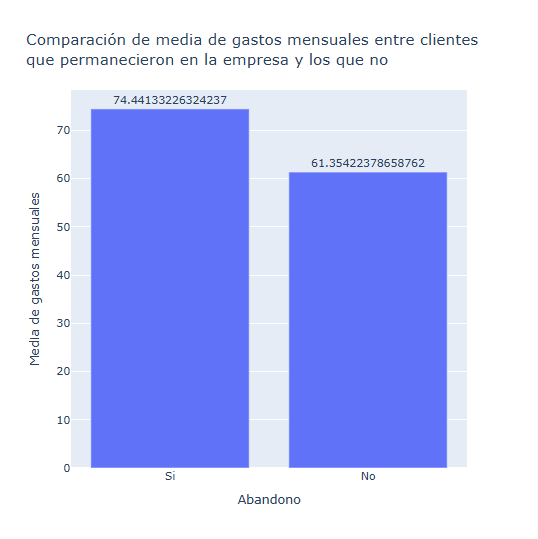

4. Por último, revisamos la correlación entre las variables numéricias del dataset y la cancelación.

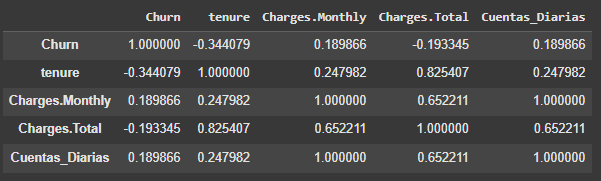

###Conclusiones
Luego de un arduo análisis de los datos, podemos obtener las siguientes conclusiones:

1. El género no parece guardar ninguna relación con la cancelación de los clientes, pues la distribución entre hombres y mujeres es muy pareja.

2. Los clientes que más cancelaron tenían un contrato renovado **mensualmente**, al contrario, los clientes con planes de 1 o 2 años no mostraron altas cancelaciones.

3. El método de pago con mayores cancelaciones fue el de **electronic check (revisión electrónica)**, mientras que los otros métodos de pago mostraron muy bajas cancelaciones.

4. El servicio de internet con el que los usuarios tienen a cancelar más es con **fibra óptica**, mostrando una cantidad de cancelaciones evidentemente mayor al **DSL**.

5. La media de **pagos mensuales** de los clientes que cancelaron es significativamente más alta que los que no lo hicieron, eso puede atribuirse a que los clientes que abandonaron tenían contratados una mayor cantidad de servicios.


###Recomendaciones:
Basado en los insights detallados anteriormente, he podido formular las siguientes recomendaciones para TelecomX:

1. **Promover** los planes de contrato a largo plazo (1 o 2 años) para reducir significativamente la tasa de cancelación. Usar herramientas como descuentos y promociones para los planes de 1 o 2 años para mantener a los clientes suscritos a la compañía.

2. **Agregar** descuentos a pagos con tarjeta de crédito, ya que es el método de pago con menor tasa de cancelación. Además, fomentar el pago automático ayuda a reducir costos operativos y a asegurar la permanencia del cliente.

3. **Revisar** la disponibilidad, efectividad y calidad del servicio de **Fibra óptica**, pues es el servicio que presenta mayores cancelaciones. Se recomienda a la empresa investigar si esta alta tasa de cancelación está relacionada con la calidad del servicio.